In [10]:
import pandas as pd

# Example data (you would replace this with your actual model results)
data = {
    "Model": [
        "Simple ARIMA",
        "ARIMA with Grid Search Hyperparameter Tuning",
        "Last Value Naive",
        "Exponential Smoothing (ETS)",
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "E6",
        "E7",
        "E8",
        "LLM Gemini 1.5 Flash",
        "LLM Gemini 2.0 Flash",
        "LLM Meta LLaMA 3.3-70B Versatile",
        "LLM Meta LLaMA 3 70B-8192",
    ],
    "MSE": [
        164.012,
        61.905,
        25.44,
        27.48,
        24.97,
        24.97,
        34.66,
        23.65,
        23.65,
        22.86,
        24.44,
        24.44,
        11.98,
        13.48,
        12.23,
        13.26,
    ],
    "RMSE": [
        12.80,
        7.86,
        5.04,
        5.24,
        5.00,
        5.00,
        5.89,
        4.86,
        4.86,
        4.78,
        4.94,
        4.94,
        3.46,
        3.67,
        3.49,
        3.64,
    ],
    "MAE": [
        11.031,
        6.413,
        3.80,
        3.97,
        3.78,
        3.78,
        4.48,
        3.71,
        3.72,
        3.75,
        3.75,
        3.75,
        2.69,
        2.82,
        2.64,
        2.78,
    ],
    "MAPE": [
        14.85,
        8.85,
        5,
        5.24,
        5,
        5,
        5.89,
        4.86,
        4.86,
        4.78,
        4.94,
        4.94,
        3.46,
        3.78,
        3.54,
        3.73,
    ],
}

df = pd.DataFrame(data)

C:\Users\sid90\AppData\Local\Temp\ipykernel_18584\1655254859.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sid90\AppData\Local\Temp\ipykernel_18584\1655254859.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sid90\AppData\Local\Temp\ipykernel_18584\1655254859.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sid90\AppData\Local\Temp\ipykernel_18584\1655254859.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

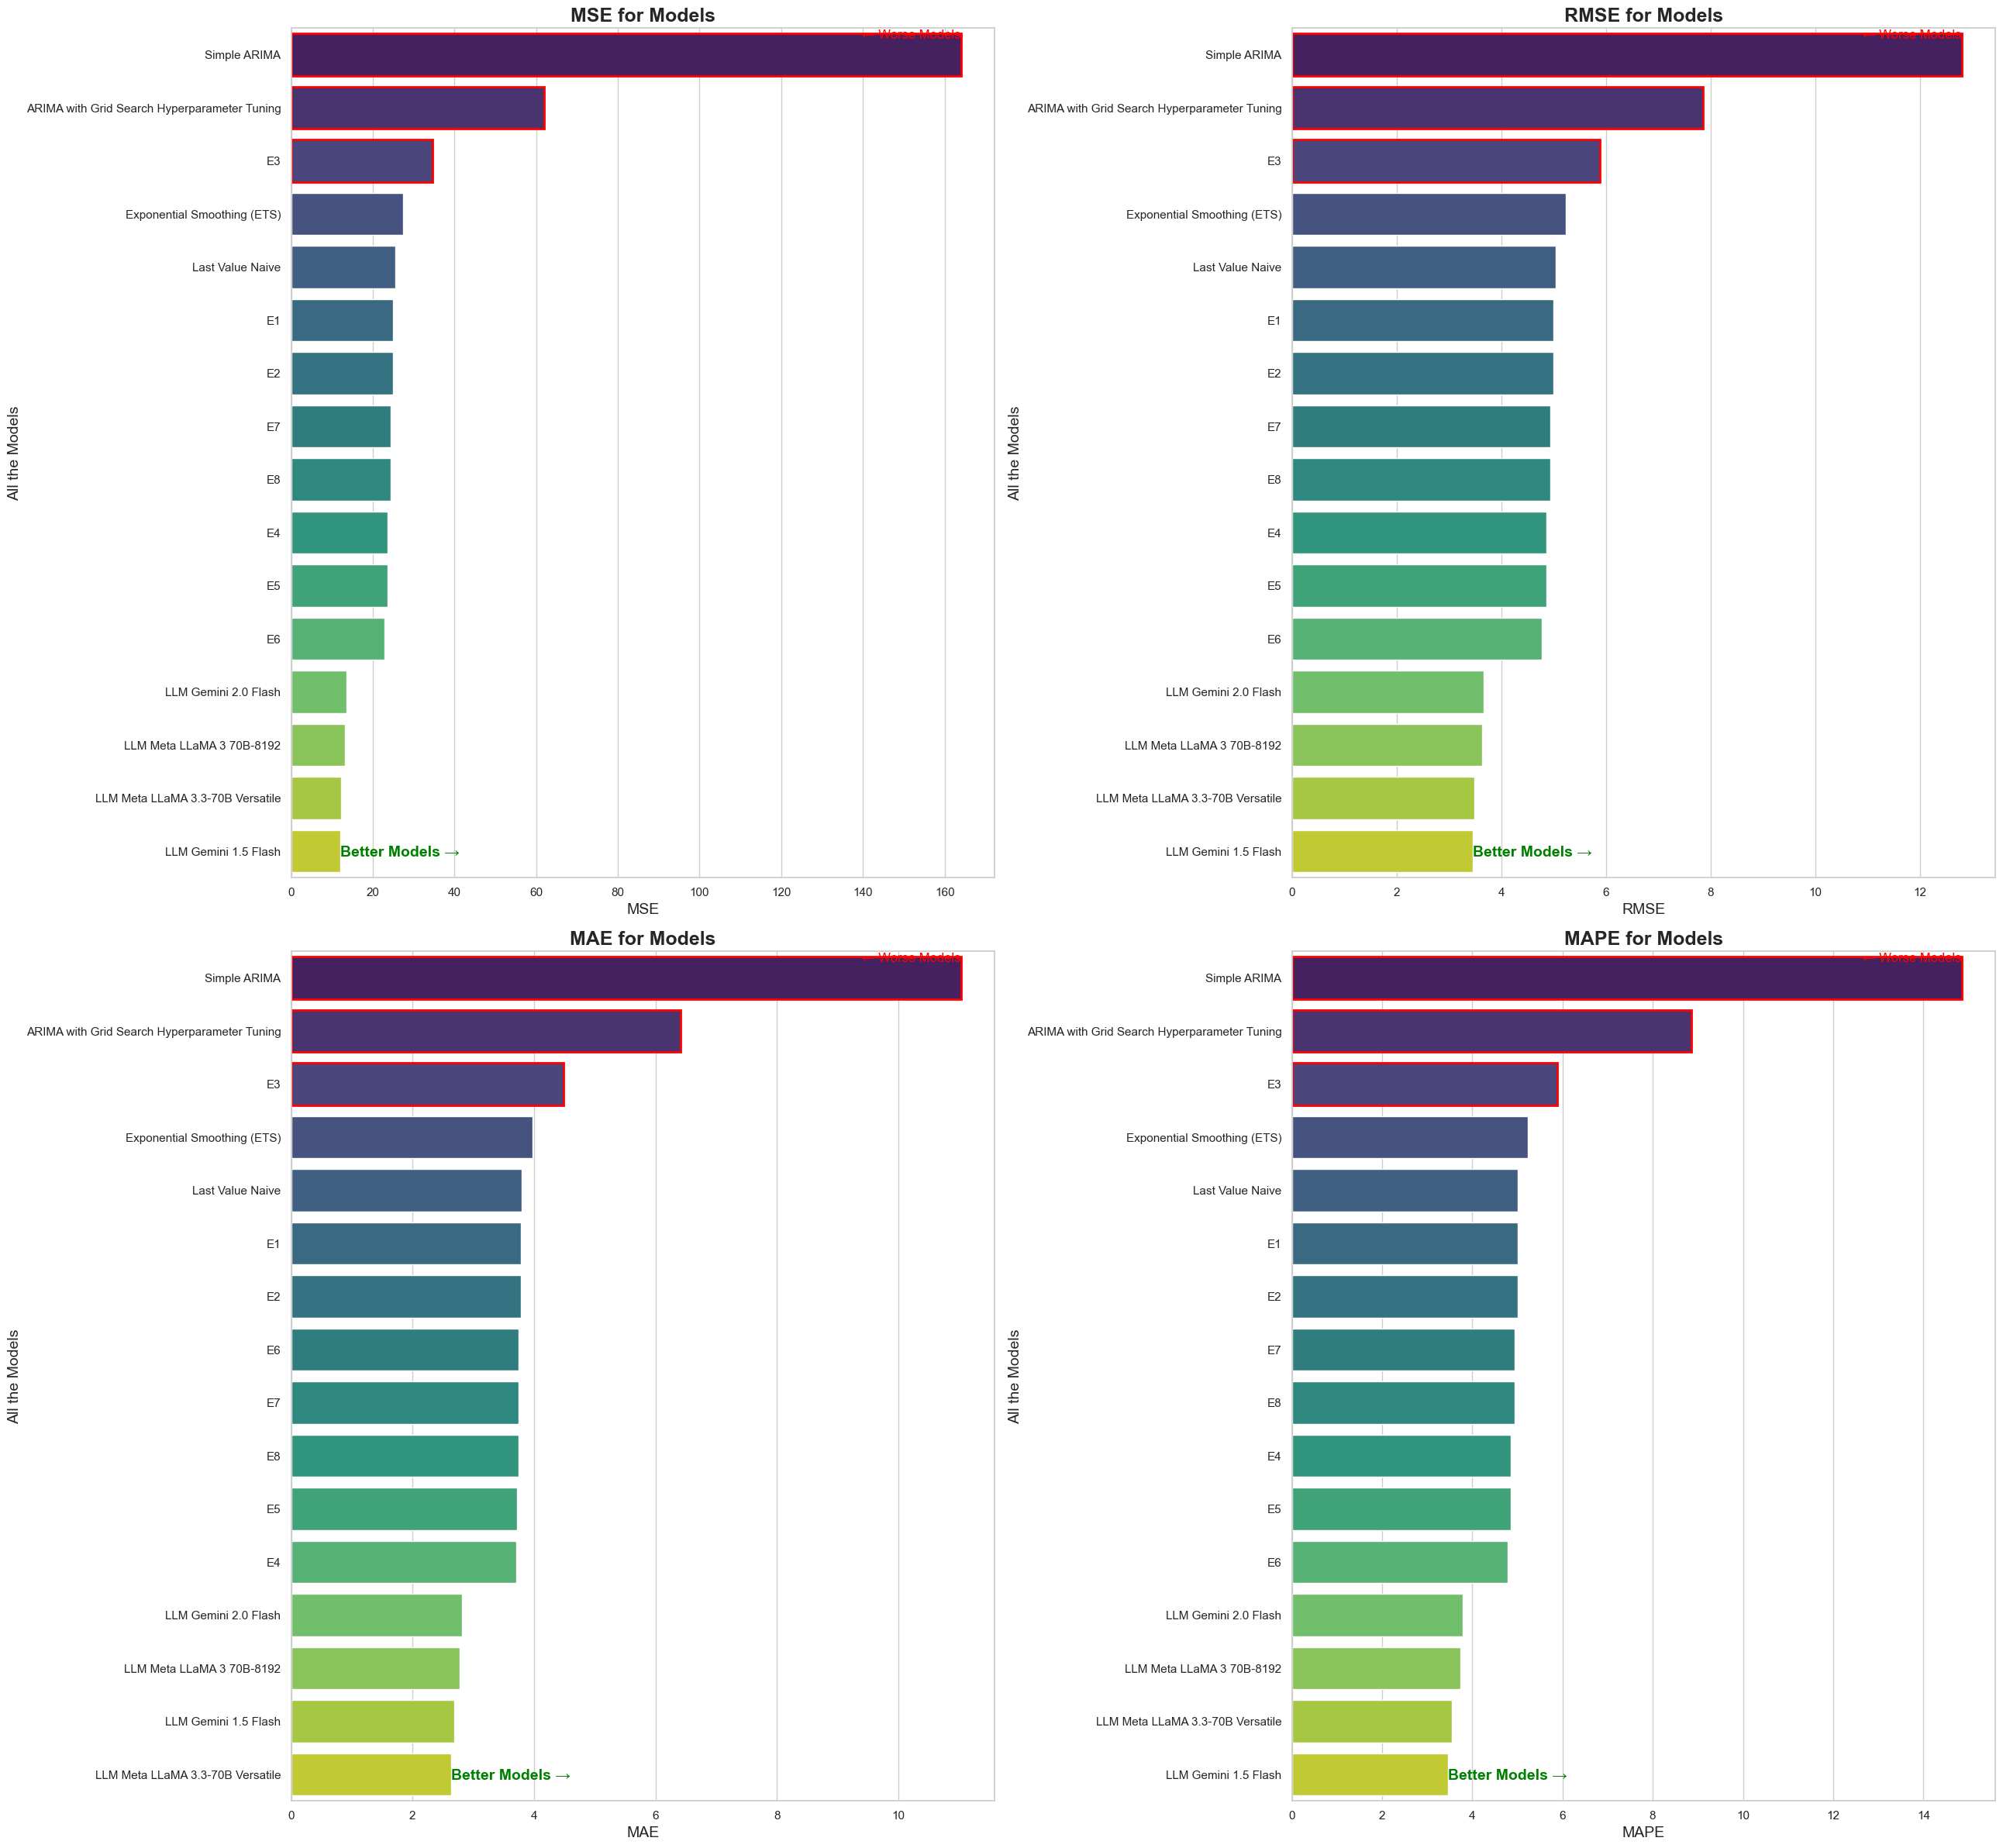

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
# Set Seaborn style
sns.set(style="whitegrid")

# Metrics where lower is better
metrics_low_better = ['MSE', 'RMSE', 'MAE', 'MAPE']

# Plot each metric
fig, axs = plt.subplots(2, 2, figsize=(26, 24))  # 6 plots (we'll use 5)
axs = axs.flatten()

for i, metric in enumerate(['MSE', 'RMSE', 'MAE', 'MAPE']):
    if metric in metrics_low_better:
        sorted_df = df.sort_values(by=metric, ascending=False)
        better_side = 'left'
    else:  # For R2_Score
        sorted_df = df.sort_values(by=metric, ascending=True)
        better_side = 'right'

    sns.barplot(
        x=metric, 
        y='Model', 
        data=sorted_df, 
        ax=axs[i], 
        palette="viridis"
    )
    
    axs[i].set_title(f'{metric} for Models', fontsize=18, weight='bold')
    axs[i].set_xlabel(metric, fontsize=14)
    axs[i].set_ylabel('All the Models', fontsize=14)
    
    # Highlight top 3 models
    top_models = sorted_df['Model'].values[:3]
    for bar, label in zip(axs[i].patches, sorted_df['Model']):
        if label in top_models:
            bar.set_edgecolor('red')
            bar.set_linewidth(2)

    # Dynamically get limits
    x_min, x_max = axs[i].get_xlim()
    y_min, y_max = axs[i].get_ylim()
    
    # Adjust y-coordinates for labels (slightly outside y_min and y_max)
    label_y_top = y_max + 0.2
    label_y_bottom = y_min - 0.4

    # Add 'Better models' label
    if better_side == 'left':
        axs[i].annotate('Better Models →', 
                        xy=(sorted_df[metric].min(), label_y_bottom), 
                        xytext=(sorted_df[metric].min(), label_y_bottom),
                        fontsize=14, color='green', weight='bold',
                        ha='left'
                       )
        axs[i].annotate('← Worse Models', 
                        xy=(sorted_df[metric].max(), label_y_top),
                        xytext=(sorted_df[metric].max(), label_y_top),
                        fontsize=12, color='red',
                        ha='right'
                       )
    else:  # Better on the right
        axs[i].annotate('← Better Models', 
                        xy=(sorted_df[metric].max(), label_y_bottom), 
                        xytext=(sorted_df[metric].max(), label_y_bottom),
                        fontsize=14, color='green', weight='bold',
                        ha='right'
                       )
        axs[i].annotate('Worse Models →', 
                        xy=(sorted_df[metric].min(), label_y_top),
                        xytext=(sorted_df[metric].min(), label_y_top),
                        fontsize=12, color='red',
                        ha='left'
                       )

# Hide the extra subplot
if len(axs) > 5:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()
